In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3, ))
])

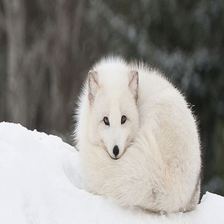

In [4]:
arctic_fox = Image.open('/content/arctic_fox.jpg').resize(IMAGE_SHAPE)
arctic_fox

In [5]:
arctic_fox = np.array(arctic_fox)/255.0
arctic_fox.shape

(224, 224, 3)

In [6]:
result = classifier.predict(arctic_fox[np.newaxis, ...])

1/1 [==============================] - 1s 731ms/step


In [7]:
result

array([[ 0.01690084,  0.12017366, -0.33025   , ...,  0.05970965,
         0.33492136, -0.24317014]], dtype=float32)

In [8]:
predicted_label = np.argmax(result)
predicted_label
# this is the label for the predicted class

280

In [9]:
labels_path = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
labels_response = tf.keras.utils.get_file('imagenet_class_index.json', labels_path)
with open(labels_response) as f:
    class_labels = f.read()

import json
class_labels = json.loads(class_labels)

35363/35363 [==============================] - 0s 0us/step


In [10]:
class_labels[str(predicted_label-1)][1]

'Arctic_fox'